In [1]:
# Importing libraries for data analysis
import pandas as  pd
import chardet
import re
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Dataset source: https://www.kaggle.com/datasets/abdulmalik1518/cars-datasets-2025/data
# Importing dataset csv file
with open("Cars Datasets 2025.csv", 'rb') as file:
    encoding = chardet.detect(file.read())['encoding']
data = pd.read_csv("Cars Datasets 2025.csv", encoding=encoding)

# Data Preprocessing

In [2]:
#Cleaning the data
def data_cleaning(a):
    if pd.isna(a): 
        return None
    a = str(a).replace(",", "").replace("$", "").strip()
    num = [float(x) for x in re.findall(r"\d+\.?\d*", a)]
    if not num:
        return None
    return sum(num)/len(num)

columns = ["CC/Battery Capacity", "HorsePower", "Total Speed", "Performance(0 - 100 )KM/H", "Cars Prices", "Torque"]
for column in columns:
    data[column] = data[column].apply(data_cleaning)

data["Seats"] = pd.to_numeric(data["Seats"], errors="coerce").astype("Int64")
data["Company Names"] = data["Company Names"].str.strip().str.upper()
data["Cars Names"] = data["Cars Names"].str.strip().str.title()
data["Fuel Types"] = data["Fuel Types"].str.strip().str.lower()
data["Engines"] = data["Engines"].str.strip().str.upper()

In [3]:
# Displaying first 5 rows of the dataset
data.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,Sf90 Stradale,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0
1,ROLLS ROYCE,Phantom,V12,6749.0,563.0,250.0,5.3,460000.0,petrol,5,900.0
2,FORD,Ka+,1.2L PETROL,1200.0,77.5,165.0,10.5,13500.0,petrol,5,120.0
3,MERCEDES,Gt 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,petrol,4,900.0
4,AUDI,Audi R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,petrol,2,560.0


In [4]:
# Displaying the last 5 rows of the dataset
data.tail()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
1213,TOYOTA,Crown Signia,2.5L HYBRID I4,2487.0,240.0,180.0,7.60,45795.0,hybrid (gas + electric),5,239.0
1214,TOYOTA,4Runner (6Th Gen),2.4L TURBO I4 (I-FORCE MAX HYBRID),2393.0,326.0,180.0,6.80,50000.0,hybrid,7,630.0
1215,TOYOTA,Corolla Cross,2.0L GAS / 2.0L HYBRID,1987.0,182.5,190.0,8.60,27172.5,gas / hybrid,5,200.0
1216,TOYOTA,C-Hr+,1.8L / 2.0L HYBRID,1892.5,169.0,180.0,9.20,33000.0,hybrid,5,197.5
1217,TOYOTA,Rav4 (6Th Gen),2.5L HYBRID / PLUG-IN HYBRID,2487.0,260.5,200.0,7.05,36000.0,hybrid / plug-in,5,310.5


In [5]:
# Displaying the shape of the dataset (Rows, Columns)
data.shape

(1218, 11)

In [6]:
# Discribing the dataset
data.describe()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque
count,1213.000000,1218.000000,1218.000000,1212.000000,1.217000e+03,1206.0,1217.000000
mean,2703.311689,307.422824,216.467159,7.564686,1.380370e+05,4.85738,506.892358
std,1942.861991,222.722922,53.051077,3.312010,7.110424e+05,1.503376,1049.512321
min,1.240000,26.000000,80.000000,1.900000,4.000000e+03,1.0,45.000000
25%,1500.000000,153.250000,180.000000,5.275000,2.800000e+04,4.0,250.000000
50%,2000.000000,255.000000,200.000000,7.100000,4.250000e+04,5.0,370.000000
75%,3500.000000,400.000000,250.000000,9.500000,7.000000e+04,5.0,560.000000
max,16100.000000,2488.000000,500.000000,35.000000,1.800000e+07,20.0,15590.000000


In [7]:
# Displaying the data types
data.dtypes

Company Names                 object
Cars Names                    object
Engines                       object
CC/Battery Capacity          float64
HorsePower                   float64
Total Speed                  float64
Performance(0 - 100 )KM/H    float64
Cars Prices                  float64
Fuel Types                    object
Seats                          Int64
Torque                       float64
dtype: object

In [8]:
# Displaying the number of duplicate rows
data.duplicated().sum()

np.int64(5)

In [9]:
# Displaying the duplicate rows if found
data[data.duplicated(keep=False)]

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
2,FORD,Ka+,1.2L PETROL,1200.0,77.5,165.0,10.5,13500.0,petrol,5,120.0
314,VOLKSWAGEN,Golf Cabriolet,1.2L I4 TURBO / 2.0L I4 TURBO,1590.5,157.5,217.0,8.4,30000.0,petrol,4,200.0
336,VOLKSWAGEN,Golf Cabriolet,1.2L I4 TURBO / 2.0L I4 TURBO,1590.5,157.5,217.0,8.4,30000.0,petrol,4,200.0
348,VOLKSWAGEN,Jetta Hybrid,1.4L I4 TURBO + ELECTRIC MOTOR,1395.0,170.0,210.0,8.6,28000.0,hybrid,5,250.0
354,VOLKSWAGEN,Jetta Hybrid,1.4L I4 TURBO + ELECTRIC MOTOR,1395.0,170.0,210.0,8.6,28000.0,hybrid,5,250.0
629,TATA MOTORS,Tiago Ev,PERMANENT MAGNET SYNCHRONOUS,24.0,74.0,120.0,5.7,11000.0,electric,5,114.0
658,TATA MOTORS,Tiago Ev,PERMANENT MAGNET SYNCHRONOUS,24.0,74.0,120.0,5.7,11000.0,electric,5,114.0
750,CHEVROLET,Tahoe Rst,5.3L V8 GASOLINE,5300.0,355.0,180.0,7.4,64100.0,petrol,7,519.0
755,CHEVROLET,Tahoe Rst,5.3L V8 GASOLINE,5300.0,355.0,180.0,7.4,64100.0,petrol,7,519.0
1018,FORD,Ka+,1.2L PETROL,1200.0,77.5,165.0,10.5,13500.0,petrol,5,120.0


In [10]:
# Handling duplicate data by dropping the rows with duplicate values if found
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [11]:
# Displaying the number of missing values
data.isnull().sum()

Company Names                 0
Cars Names                    0
Engines                       0
CC/Battery Capacity           5
HorsePower                    0
Total Speed                   0
Performance(0 - 100 )KM/H     6
Cars Prices                   1
Fuel Types                    0
Seats                        12
Torque                        1
dtype: int64

In [12]:
# Displaying the rows with missing values if found
data[data.isnull().any(axis=1)]

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
11,FERRARI,Portofino,V8,3900.0,592.0,320.0,3.2,210000.0,petrol,<NA>,760.0
12,FERRARI,Roma,V8,3900.0,612.0,320.0,3.4,230000.0,petrol,<NA>,760.0
15,FERRARI,Portofino M,V8,3900.0,612.0,320.0,3.2,220000.0,petrol,<NA>,760.0
16,FERRARI,Roma Spider,V8,3900.0,612.0,320.0,3.4,240000.0,petrol,<NA>,760.0
18,TOYOTA,Toyota 86,BOXER-4,1998.0,205.0,226.0,6.4,27000.0,petrol,<NA>,205.0
97,MERCEDES,Benz Eqs 53,ELECTRIC MOTOR,NaN,751.0,250.0,3.4,102000.0,electric,5,950.0
241,TOYOTA,Coaster,"4.0L,DIESEL",4009.0,134.0,120.0,NaN,70000.0,diesel,20,500.0
255,NISSAN,Urvan,2.5L TURBO DIESE,NaN,2488.0,140.0,14.0,28000.0,diesel,15,356.0
994,PEUGEOT,Partner Electric,ELECTRIC MOTOR,NaN,136.0,130.0,9.0,40000.0,electric,5,260.0
995,PEUGEOT,Expert Electric,ELECTRIC MOTOR,NaN,136.0,130.0,9.5,45000.0,electric,5,260.0


In [13]:
# Handling missing data by dropping the rows with missing values if found
data.dropna(inplace=True)
data.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
dtype: int64

# Exploratory Data Analysis (EDA)

In [14]:
# Displaying HorsePower descriptive statistics
data.HorsePower.describe()

count    1191.000000
mean      305.799328
std       214.077215
min        26.000000
25%       154.500000
50%       255.000000
75%       400.000000
max      1850.000000
Name: HorsePower, dtype: float64

C:\Users\nihaa_hjoailx\AppData\Local\Temp\ipykernel_8328\2290399582.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HorsePower'])


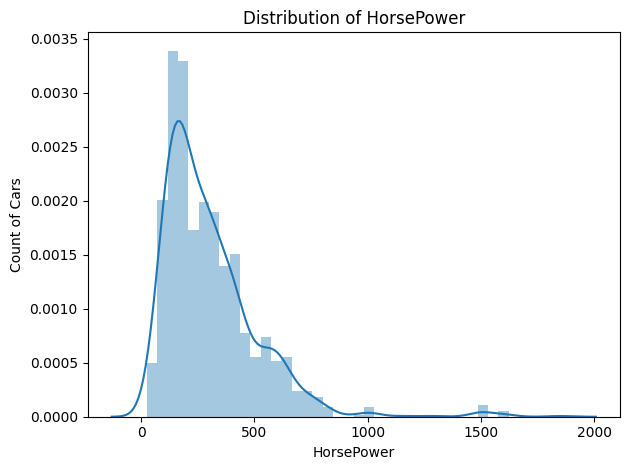

Skewness: 2.377994
Kurtosis: 9.865334


In [15]:
# Displaying HorsePower and the count of cars distribution
sns.distplot(data['HorsePower'])
plt.title('Distribution of HorsePower')
plt.xlabel('HorsePower')
plt.ylabel('Count of Cars')
plt.tight_layout()
plt.show()
# Measure of distortion of symmetric distribution
print("Skewness: %f" % data['HorsePower'].skew())
print("Kurtosis: %f" % data['HorsePower'].kurt())

Explaination -
The distribution of HorsePower is skewed to the right with a positive skewness of 0.46. The Kurtosis of 3.64 indicates that the distribution is relatively normal with a heavy tail.

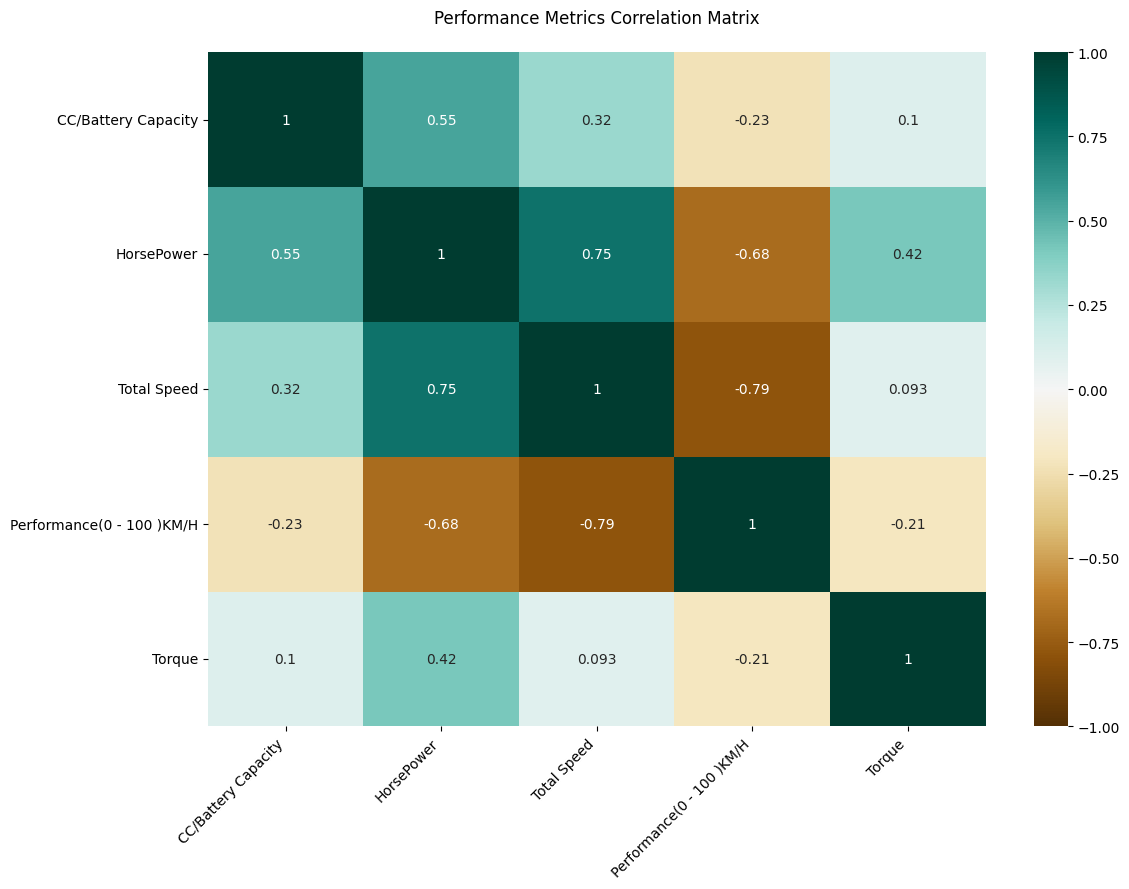

In [16]:
# Displaying the of CC/Battery Capacity, HorsePower, Total Speed, Performance(0 - 100 )KM/H and Torque correlation
factors = ['CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque']
data_clean = data[factors].copy()
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Performance Metrics Correlation Matrix\n')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Explaination -
The correlation matrix shows a strong positive correlation between HorsePower and Performance, and a weak positive correlation between HorsePower and Total Speed.

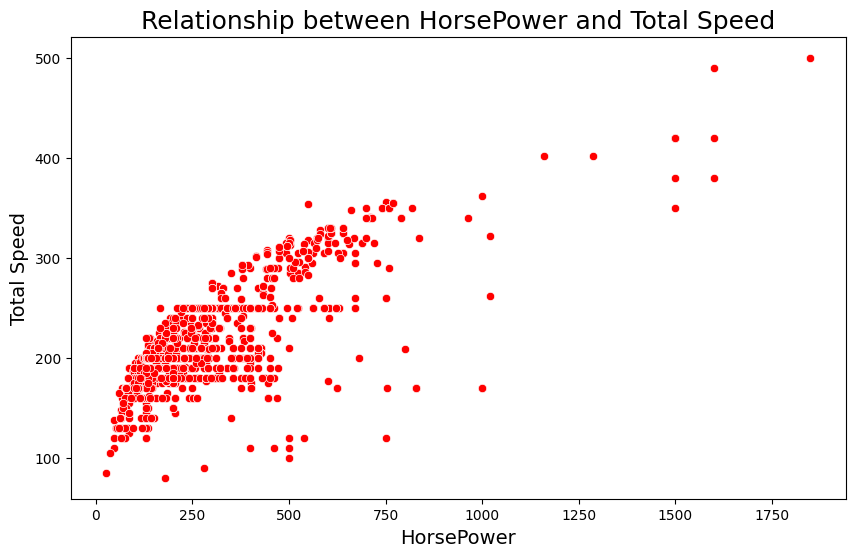

In [17]:
# Displaying the correlation between HorsePower and Total Speed using the scatterplot
plt.figure(figsize = (10,6))
sns.scatterplot(x='HorsePower',y='Total Speed',color='r',data=data)
plt.title('Relationship between HorsePower and Total Speed',size=18)
plt.xlabel('HorsePower',size=14)
plt.ylabel('Total Speed',size=14)
plt.show()

Explaination -
The scatterplot shows a strong positive correlation between HorsePower and Total Speed.


MinMax Scaling Results:
Ranges after scaling:
HorsePower: 0.000 to 1.000
CC/Battery Capacity: 0.000 to 1.000
Total Speed: 0.000 to 1.000
Performance(0 - 100 )KM/H: 0.000 to 1.000
Torque: 0.000 to 1.000
Cars Prices: 0.000 to 1.000


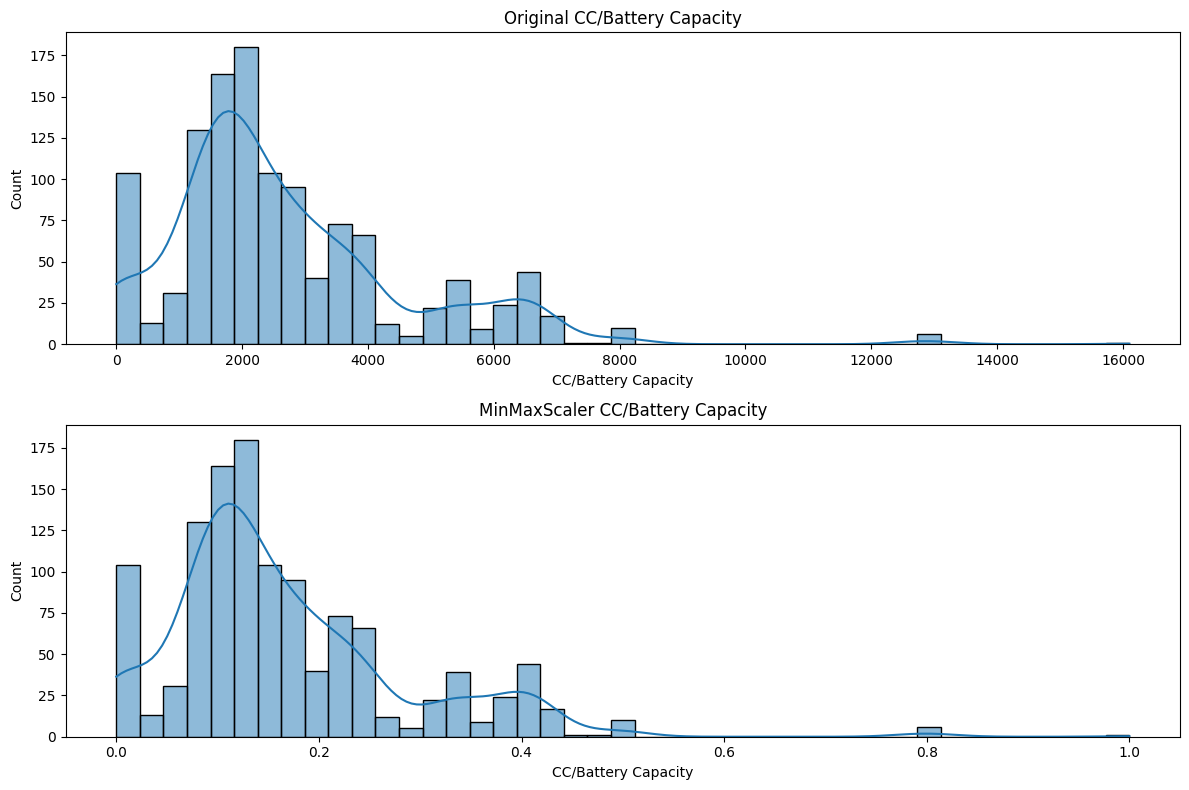

In [18]:
# Scaling data to Min-Max range [0, 1] for Histplot
numeric_columns = ['HorsePower', 'CC/Battery Capacity', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque', 'Cars Prices']

minmax_scaler = MinMaxScaler()
data_minmax = data.copy()
data_minmax[numeric_columns] = minmax_scaler.fit_transform(data[numeric_columns])

print("\nMinMax Scaling Results:")
print(f"Ranges after scaling:")
for col in numeric_columns:
    print(f"{col}: {data_minmax[col].min():.3f} to {data_minmax[col].max():.3f}")

# Compare distributions before and after scaling
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Original data
sns.histplot(data['CC/Battery Capacity'], ax=axes[0], kde=True)
axes[0].set_title('Original CC/Battery Capacity')

# Scaled data
sns.histplot(data_minmax['CC/Battery Capacity'], ax=axes[1], kde=True)
axes[1].set_title('MinMaxScaler CC/Battery Capacity')

plt.tight_layout()
plt.show()

Explaination -
The histogram for the original data shows a skewed distribution with a long tail. The histogram for the scaled data shows a normal distribution with a short tail.


MinMax Scaling Results:
Ranges after scaling:
HorsePower: 0.000 to 1.000
CC/Battery Capacity: 0.000 to 1.000
Total Speed: 0.000 to 1.000
Performance(0 - 100 )KM/H: 0.000 to 1.000
Torque: 0.000 to 1.000
Cars Prices: 0.000 to 1.000


Text(0, 0.5, 'Scaled CC/Battery Capacity (0-1)')

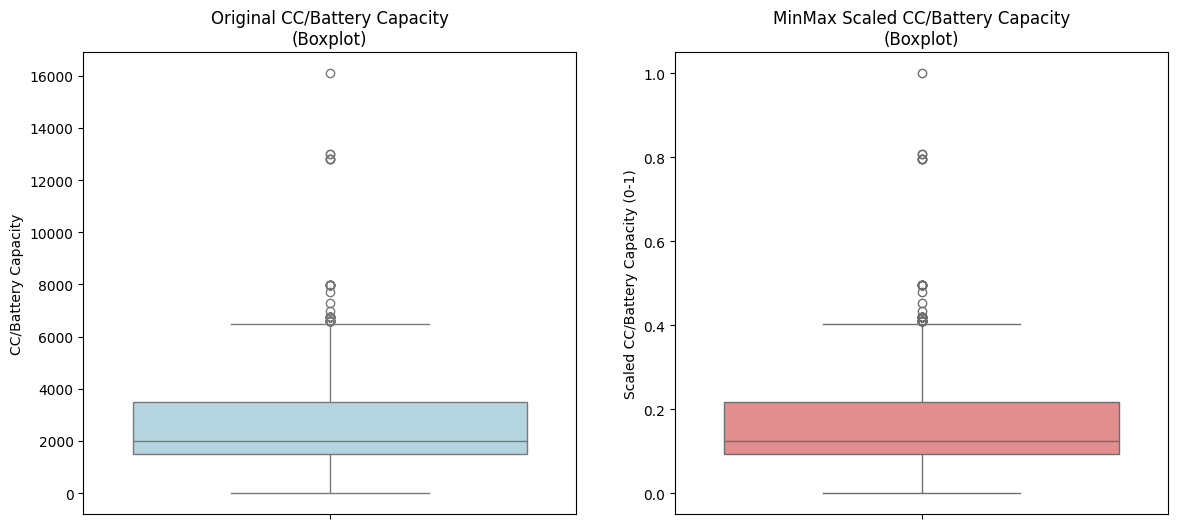

In [19]:
# Scaling data to Min-Max range [0, 1] for Boxplot
numeric_columns = ['HorsePower', 'CC/Battery Capacity', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque', 'Cars Prices']

minmax_scaler = MinMaxScaler()
data_minmax = data.copy()
data_minmax[numeric_columns] = minmax_scaler.fit_transform(data[numeric_columns])

print("\nMinMax Scaling Results:")
print(f"Ranges after scaling:")
for col in numeric_columns:
    print(f"{col}: {data_minmax[col].min():.3f} to {data_minmax[col].max():.3f}")

# Compare distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for original data
sns.boxplot(y=data['CC/Battery Capacity'], ax=ax1, color='lightblue')
ax1.set_title('Original CC/Battery Capacity\n(Boxplot)')
ax1.set_ylabel('CC/Battery Capacity')

# Boxplot for scaled data
sns.boxplot(y=data_minmax['CC/Battery Capacity'], ax=ax2, color='lightcoral')
ax2.set_title('MinMax Scaled CC/Battery Capacity\n(Boxplot)')
ax2.set_ylabel('Scaled CC/Battery Capacity (0-1)')


Explaination -
The boxplot for the original data shows a skewed distribution with a long tail. The boxplot for the scaled data shows a normal distribution with a short tail.

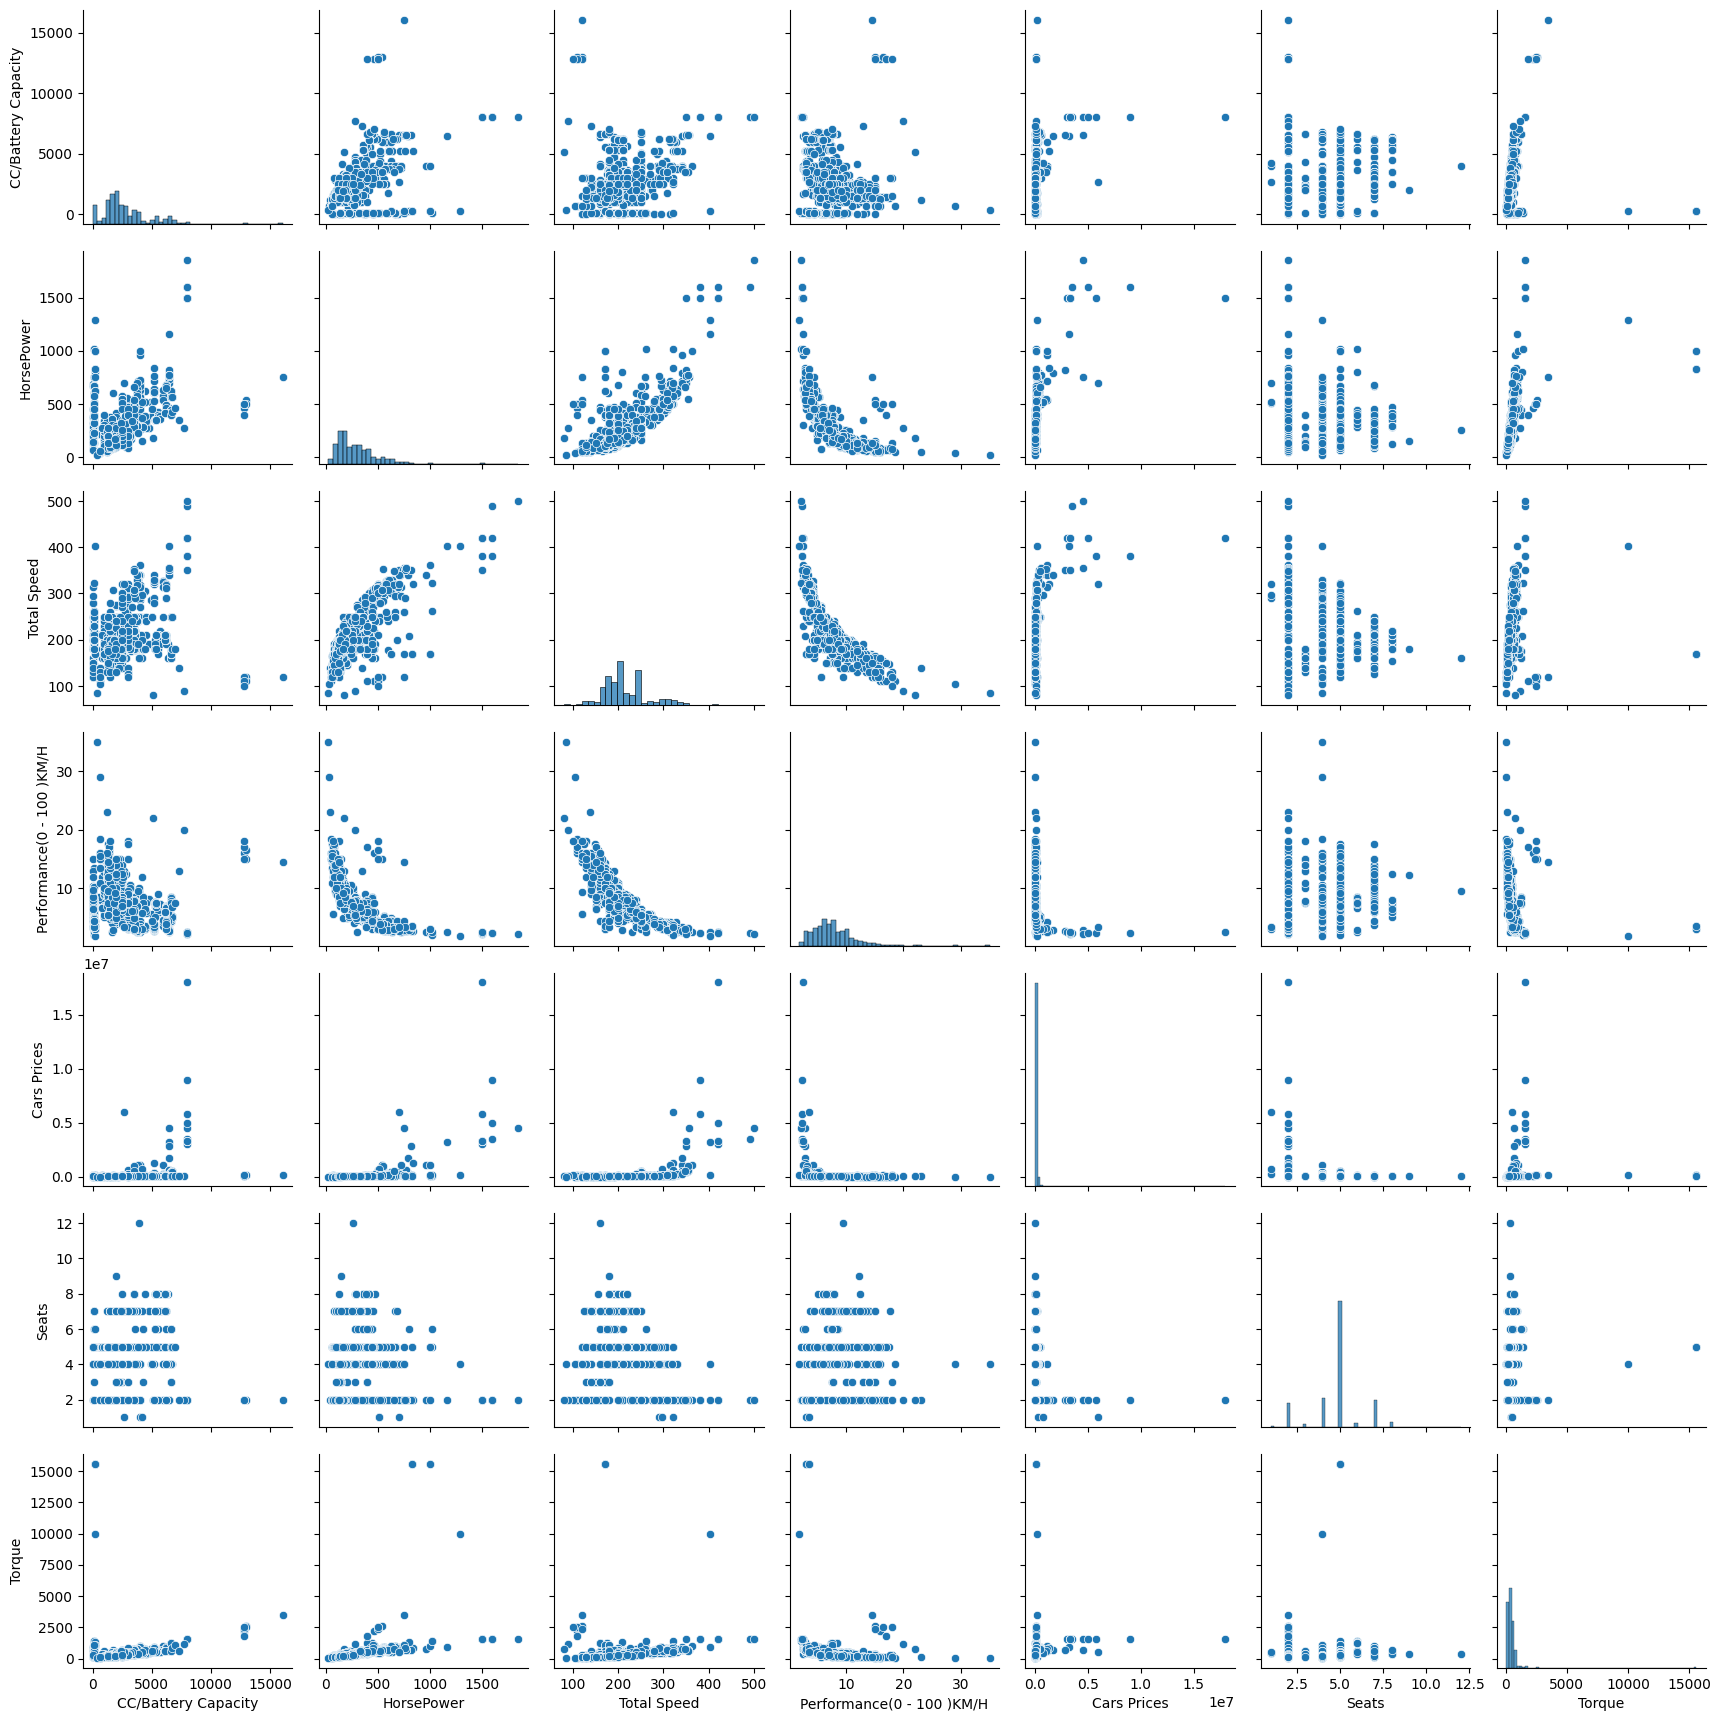

In [20]:
# Displaying the pairplot
sns.pairplot(data)

Explaination -
The pairplot shows a strong positive correlation between HorsePower and Performance, and a weak positive correlation between HorsePower and Total Speed.

# Machine Learning Analysis - Linear Regression

In [21]:
# Training and testing Linear Regression analysis model
factors = ['CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Torque']
X = pd.DataFrame(data[factors].copy())
y = data['Cars Prices'].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=324)
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
reg_model.score(X_test,y_test)
print("Mean Absolute Error is : $" , mean_absolute_error(y_test,y_pred))
print("R^2 is : ", r2_score(y_test,y_pred))


Mean Absolute Error is : $ 194307.94220675508
R^2 is :  -0.20042211207549987


Explaination -
The regression analysis model has a mean absolute error of $194307.94220675508 and an R^2 of -0.20042211207549987. This model is not accurate as it fails to predict the actual prices of the cars.